In [1]:
%matplotlib inline

In [2]:
#format the book
import book_format
book_format.set_style()

我还在考虑如何写这一章。 与此同时，克利夫兰州立大学的 Dan Simon 教授在这里做了一个易于理解的介绍：

http://academic.csuohio.edu/simond/courses/eec641/hinfinity.pdf

一句话，$H_\infty$ (H infty$) 过滤器就像一个卡尔曼过滤器，但它在面对非高斯、不可预测的输入时是鲁棒的。

我的 FilterPy 库包含一个 H-Infinity 过滤器。 我在下面粘贴了一些测试代码，这些代码实现了上面文章中 Simon 设计的过滤器。 希望能帮助到你。

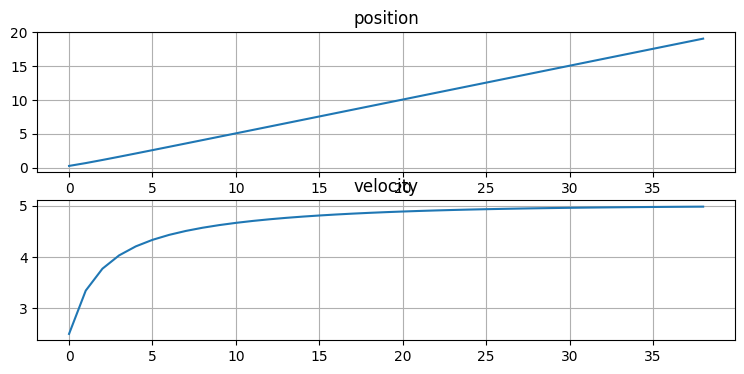

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from filterpy.hinfinity import HInfinityFilter

dt = 0.1
f = HInfinityFilter(2, 1, dim_u=1, gamma=.01)

f.F = np.array([[1., dt],
                [0., 1.]])

f.H = np.array([[0., 1.]])
f.G = np.array([[dt**2 / 2, dt]]).T

f.P = 0.01
f.W = np.array([[0.0003, 0.005],
                [0.0050, 0.100]])/ 1000  #process noise

f.V = 0.01
f.Q = 0.01
u = 1. #acceleration of 1 f/sec**2

xs = []
vs = []

for i in range(1,40):
    f.update (5)
    #print(f.x.T)
    xs.append(f.x[0,0])
    vs.append(f.x[1,0])
    f.predict(u=u)

plt.subplot(211)
plt.plot(xs)
plt.title('position')
plt.subplot(212)
plt.plot(vs) 
plt.title('velocity');